In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


The median number of symptoms across all diseases is: 9.5


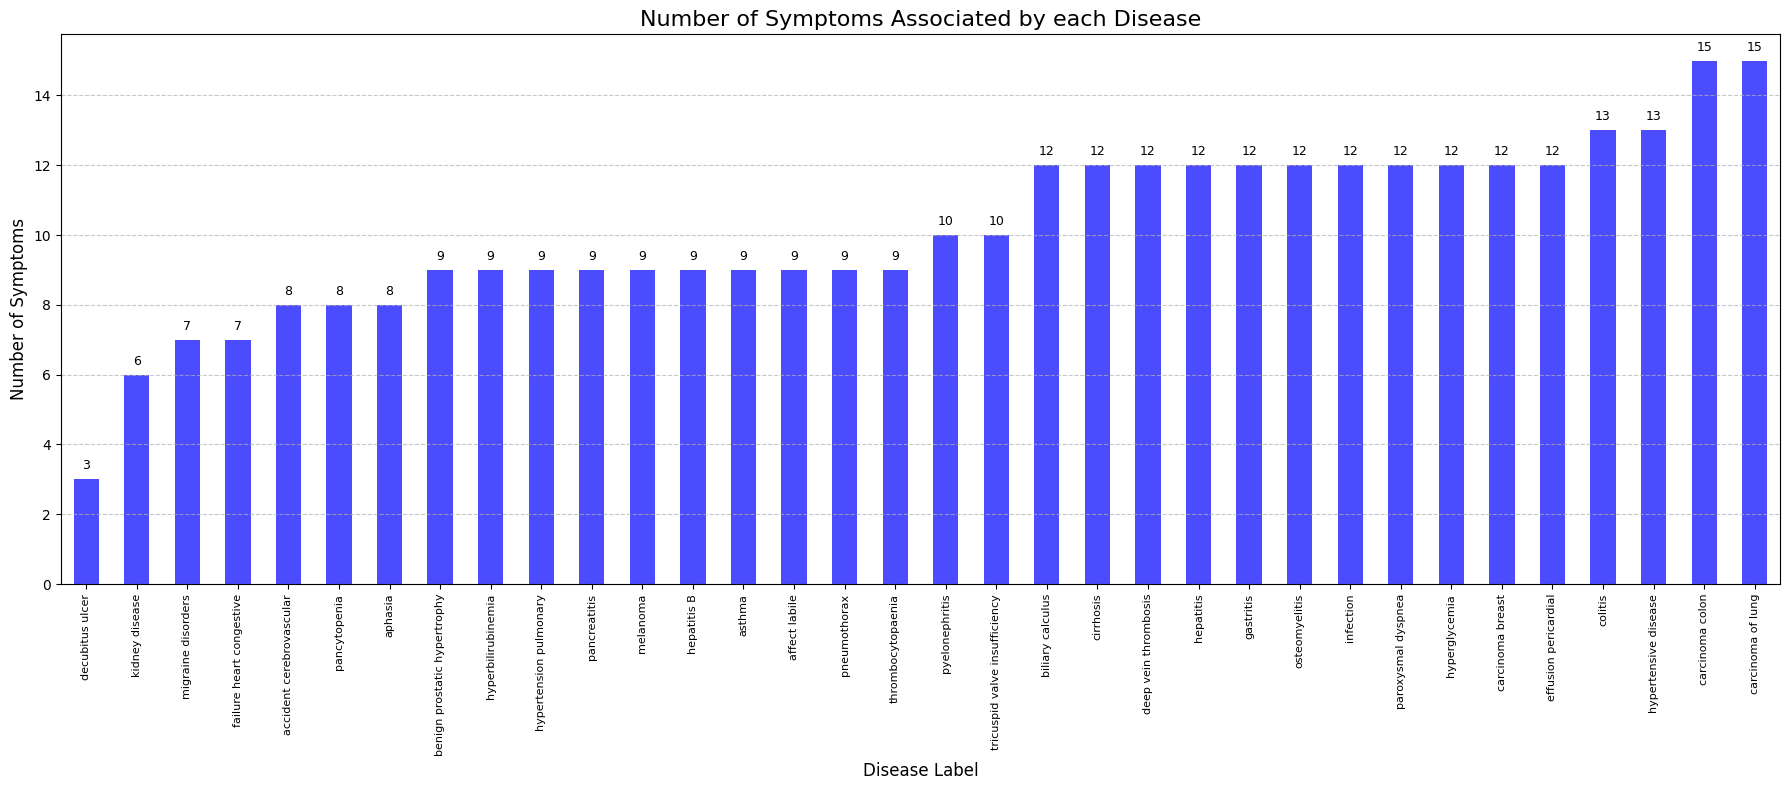

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/reduced5.csv')

# Calculate the number of symptoms associated with each disease
data['symptom_count'] = data.iloc[:, :-1].sum(axis=1)  # Sum the 1s in symptom columns (assumes last column is disease_label)
disease_symptom_counts = data.groupby('disease_label')['symptom_count'].mean()

# Visualize the number of symptoms per disease
plt.figure(figsize=(18, 8))
bars = disease_symptom_counts.sort_values().plot(kind='bar', color='blue', alpha=0.7)

# Add the number of symptoms on top of each bar
for index, value in enumerate(disease_symptom_counts.sort_values()):
    plt.text(index, value + 0.2, f'{int(value)}', ha='center', va='bottom', fontsize=9)

# Calculate the median number of symptoms
median_symptoms = disease_symptom_counts.median()

# Print the result
print(f"The median number of symptoms across all diseases is: {median_symptoms}")

# Customize the plot
plt.title("Number of Symptoms Associated by each Disease", fontsize=16)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Symptoms", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(data['disease_label'].unique())
print("\n Total number of unique diseases: ", data['disease_label'].nunique())

['hypertensive disease' 'failure heart congestive'
 'accident cerebrovascular' 'asthma' 'infection'
 'benign prostatic hypertrophy' 'pancreatitis' 'paroxysmal dyspnea'
 'hypertension pulmonary' 'thrombocytopaenia' 'colitis' 'hepatitis B'
 'tricuspid valve insufficiency' 'kidney disease' 'carcinoma colon'
 'melanoma' 'carcinoma of lung' 'aphasia' 'pyelonephritis' 'pneumothorax'
 'hyperbilirubinemia' 'migraine disorders' 'pancytopenia'
 'biliary calculus' 'affect labile' 'decubitus ulcer'
 'deep vein thrombosis' 'cirrhosis' 'carcinoma breast' 'osteomyelitis'
 'gastritis' 'hepatitis' 'hyperglycemia' 'effusion pericardial']

 Total number of unique diseases:  34


# 3.0 Making Combination

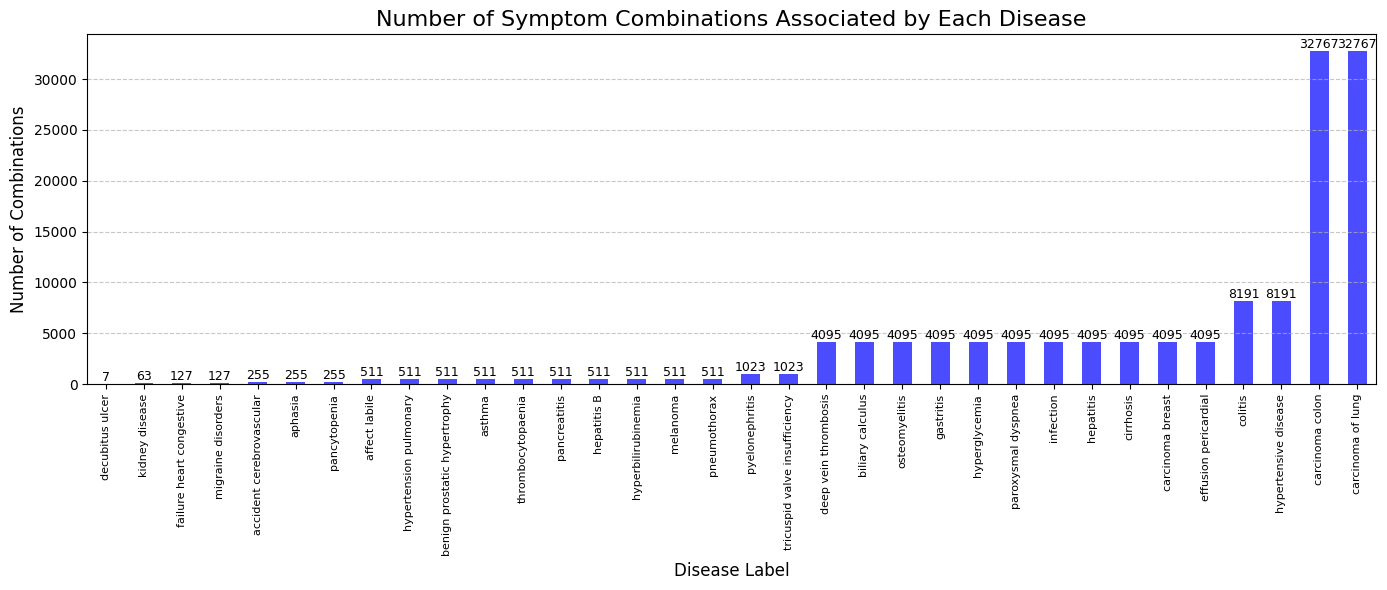

One-hot encoded symptom combinations have been generated and saved as 'full_combinations_one_hot.csv'.


In [ ]:
import pandas as pd
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

# Load the filtered dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/reduced5.csv')

# Define a function to generate one-hot encoded combinations for a row
def generate_one_hot_combinations(row, symptom_cols):
    # Get the active symptoms (columns with value 1)
    active_symptoms = [symptom for symptom in symptom_cols if row[symptom] == 1]
    # Generate all possible non-empty combinations
    symptom_combinations = []
    for r in range(1, len(active_symptoms) + 1):  # Generate combinations of 1 to n symptoms
        for combo in combinations(active_symptoms, r):
            # Create a new one-hot encoded row for each combination
            new_row = {col: 0 for col in symptom_cols}  # Initialize all symptoms to 0
            for symptom in combo:
                new_row[symptom] = 1  # Set active symptoms in the combination to 1
            new_row['disease_label'] = row['disease_label']  # Add the disease label
            symptom_combinations.append(new_row)
    return symptom_combinations

# Get the symptom columns (all columns except 'disease_label')
symptom_cols = data.columns[:-1]

# Generate one-hot encoded combinations for all rows
all_combinations = []
for _, row in data.iterrows():
    all_combinations.extend(generate_one_hot_combinations(row, symptom_cols))

# Create a new DataFrame from the combinations
combination_data = pd.DataFrame(all_combinations)

# Save the new dataset
combination_data.to_csv('/content/drive/MyDrive/P2/T1.2/Dataset/full_combinations.csv', index=False)

# Visualize the distribution of combinations per disease
disease_combination_counts = combination_data['disease_label'].value_counts()

plt.figure(figsize=(14, 6))
bars = disease_combination_counts.sort_values().plot(kind='bar', color='blue', alpha=0.7)

# Add the number of combinations on top of each bar
for index, value in enumerate(disease_combination_counts.sort_values()):
    plt.text(index, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Symptom Combinations Associated by Each Disease", fontsize=16)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Combinations", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print a message indicating completion
print("One-hot encoded symptom combinations have been generated and saved as 'full_combinations_one_hot.csv'.")


In [ ]:
total_rows = len(combination_data)
print(f"Total number of rows in the dataset: {total_rows}")

Total number of rows in the dataset: 135206


# Visualize the data distribution

Total number of rows in the dataset: 135206


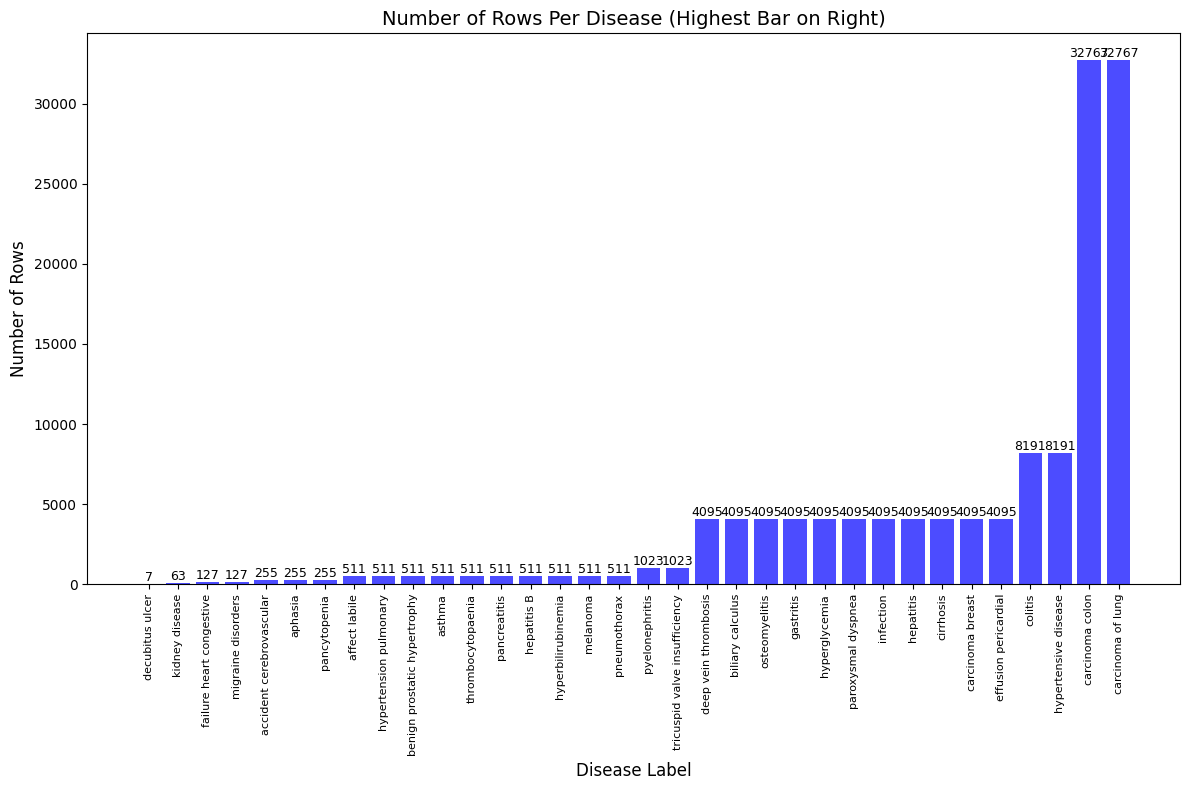

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the expanded dataset
expanded_df = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/full_combinations.csv")

# Print the total number of rows in the CSV file
total_rows = len(expanded_df)
print(f"Total number of rows in the dataset: {total_rows}")

# Group the expanded dataset by disease to count rows per disease
disease_distribution = expanded_df["disease_label"].value_counts()

# Sort the disease distribution in ascending order to have the highest bar at the right
sorted_distribution = disease_distribution.sort_values(ascending=True)

# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_distribution.index, sorted_distribution.values, alpha=0.7, color="blue", label="Bar Plot")

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease (Highest Bar on Right)", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()


# 5.0 Extract 15% for both Validation and Testing_dataset

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/full_combinations.csv")

# Set the percentage of samples for testing and validation
test_ratio = 0.15  # 10% for testing
val_ratio = 0.15   # 10% for validation
min_samples = 2    # Ensure at least one sample per split

# Initialize lists to hold training, validation, and testing data
training_data = []
validation_data = []
testing_data = []

# Group by disease and split ensuring all diseases are represented
for disease, group in data.groupby("disease_label"):
    total_samples = len(group)
    test_samples = max(int(total_samples * test_ratio), min_samples)
    val_samples = max(int(total_samples * val_ratio), min_samples)

    if total_samples > (test_samples + val_samples):
        # Ensure sufficient samples for training
        test_group = group.sample(n=test_samples, random_state=42)
        remaining_group = group.drop(test_group.index)
        val_group = remaining_group.sample(n=val_samples, random_state=42)
        train_group = remaining_group.drop(val_group.index)
    else:
        # If insufficient samples, split unevenly but ensure representation
        test_group = group.sample(n=min(min_samples, total_samples - 1), random_state=42)
        remaining_group = group.drop(test_group.index)
        val_group = remaining_group.sample(n=min(min_samples, len(remaining_group)), random_state=42)
        train_group = remaining_group.drop(val_group.index)

    testing_data.append(test_group)
    validation_data.append(val_group)
    training_data.append(train_group)

# Combine all splits into final datasets
training_dataset = pd.concat(training_data).reset_index(drop=True)
validation_dataset = pd.concat(validation_data).reset_index(drop=True)
testing_dataset = pd.concat(testing_data).reset_index(drop=True)

# Save the datasets to separate files
training_dataset.to_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_train99.csv", index=False)
validation_dataset.to_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_val99.csv", index=False)
testing_dataset.to_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_test99.csv", index=False)

# Print confirmation and data distribution
print(f"Training dataset saved with {training_dataset.shape[0]} samples.")
print(f"Validation dataset saved with {validation_dataset.shape[0]} samples.")
print(f"Testing dataset saved with {testing_dataset.shape[0]} samples.")

# Optionally, print class distributions
print("\nTraining Data Distribution:")
print(training_dataset['disease_label'].value_counts())

print("\nValidation Data Distribution:")
print(validation_dataset['disease_label'].value_counts())

print("\nTesting Data Distribution:")
print(testing_dataset['disease_label'].value_counts())


In [ ]:
# Validate the number of unique disease labels
training_labels = set(training_dataset["disease_label"].unique())
testing_labels = set(testing_dataset["disease_label"].unique())

if training_labels == testing_labels:
    print("Both training and testing datasets have all same disease labels.")
else:
    missing_in_training = testing_labels - training_labels
    missing_in_testing = training_labels - testing_labels
    print(f"Labels missing in training dataset: {missing_in_training}")
    print(f"Labels missing in testing dataset: {missing_in_testing}")


Both training and testing datasets have all same disease labels.


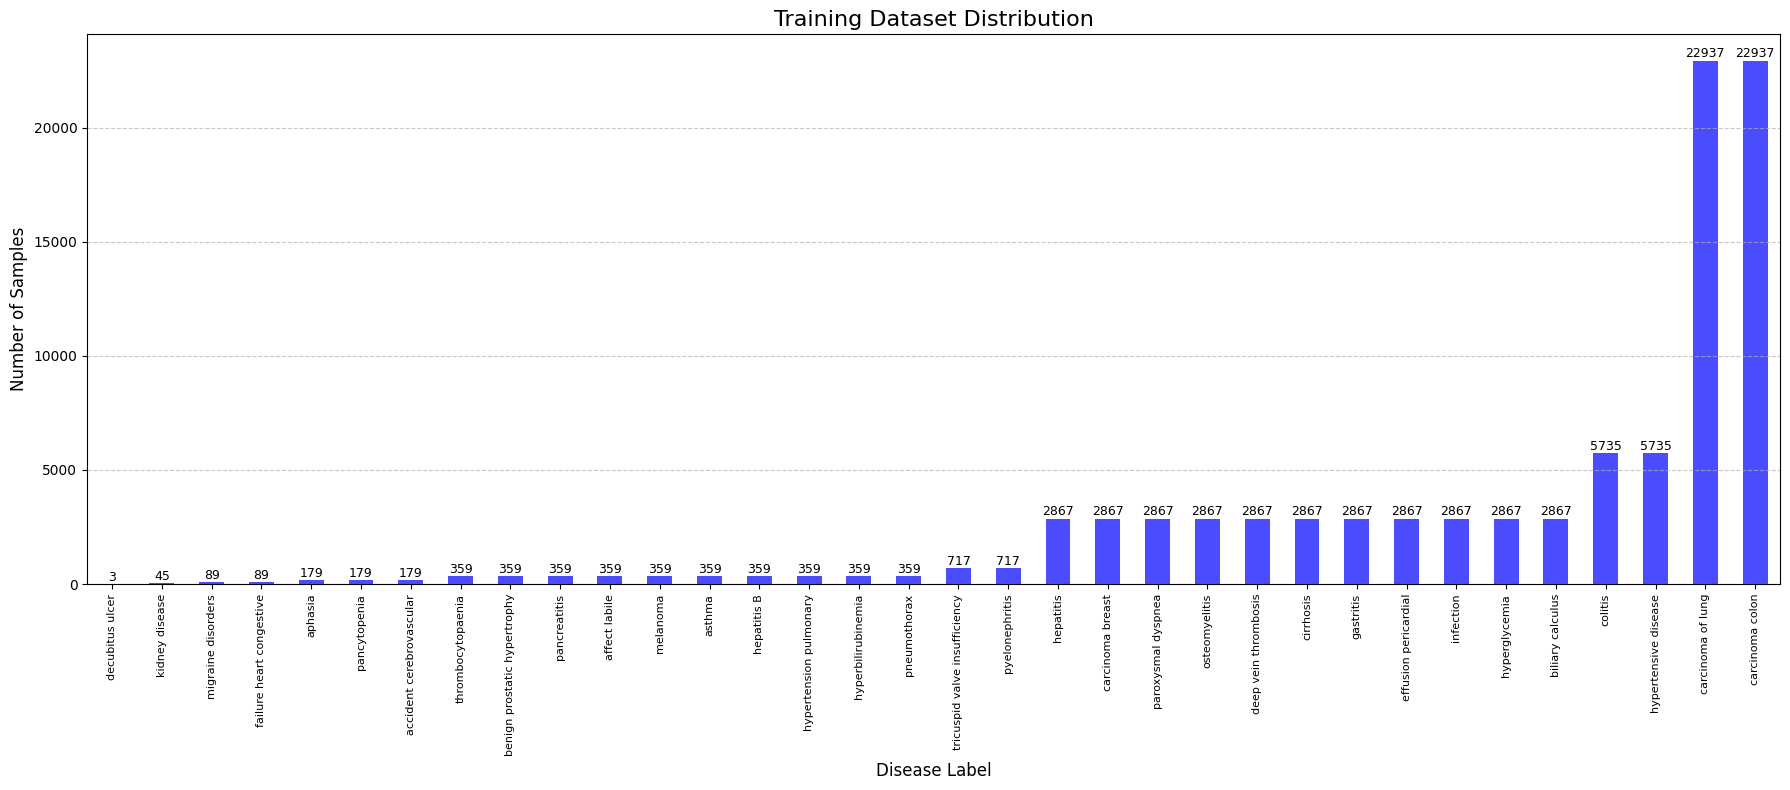

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training dataset
training_dataset = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_train.csv")

# Plot the distribution of diseases in the training dataset
def plot_training_distribution(data, title):
    disease_counts = data['disease_label'].value_counts().sort_values()
    plt.figure(figsize=(18, 8))
    bars = disease_counts.plot(kind='bar', color='blue', alpha=0.7)

    # Add the number of rows on top of each bar
    for index, value in enumerate(disease_counts):
        plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=9)

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Disease Label", fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the plotting function for training dataset
plot_training_distribution(training_dataset, "Training Dataset Distribution")


In [ ]:
print(training_dataset["disease_label"].value_counts())
print(testing_dataset["disease_label"].value_counts())

disease_label
carcinoma colon                  22937
carcinoma of lung                22937
colitis                           5735
hypertensive disease              5735
hepatitis                         2867
gastritis                         2867
cirrhosis                         2867
effusion pericardial              2867
deep vein thrombosis              2867
biliary calculus                  2867
osteomyelitis                     2867
infection                         2867
hyperglycemia                     2867
paroxysmal dyspnea                2867
carcinoma breast                  2867
tricuspid valve insufficiency      717
pyelonephritis                     717
affect labile                      359
thrombocytopaenia                  359
pancreatitis                       359
pneumothorax                       359
hepatitis B                        359
benign prostatic hypertrophy       359
asthma                             359
melanoma                           359
hyperbiliru